# Introduction to Root Finding

In [1]:
using DrWatson;
@quickactivate "MATH361Lectures";
import MATH361Lectures

In [2]:
using Polynomials, Plots, LaTeXStrings
default(markersize=3,linewidth=1.5);

Let's look at the problem of finding roots for the quadratic polynomial function $f(x)=x^2 - 4x + 3.5$  as a fixed point iteration. 

In [3]:
f = x -> x^2 - 4*x + 3.5
@show r = roots(Polynomial([3.5,-4,1]));

r = roots(Polynomial([3.5, -4, 1])) = [1.2928932188134525, 2.7071067811865475]


We'll define $g(x) = x - f(x)$. Notice that any point of intersection of the graph of $y=g(x)$ with the line $y=x$ is a fixed point for $g$ and hence a root of $f$. 

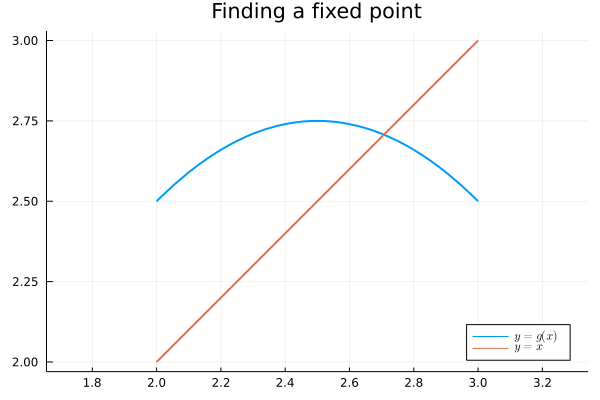

In [4]:
g = x -> x - f(x)
plt=plot([g,x->x],2,3,label=[L"y=g(x)" L"y=x"],aspect_ratio=1,linewidth=2,
    title="Finding a fixed point",legend=:bottomright)

If we evaluate $g(2.1)$, we get a value of almost 2.6.

In [5]:
x = 2.1; y = g(x)

2.5900000000000003

So $g(x)$ is considerably closer to a fixed point than $x$ was. The value $y=g(x)$ ought to become our new $x$ value. Changing the $x$ coordinate in this way is the same as following a horizontal line over to the graph of $y=x$.

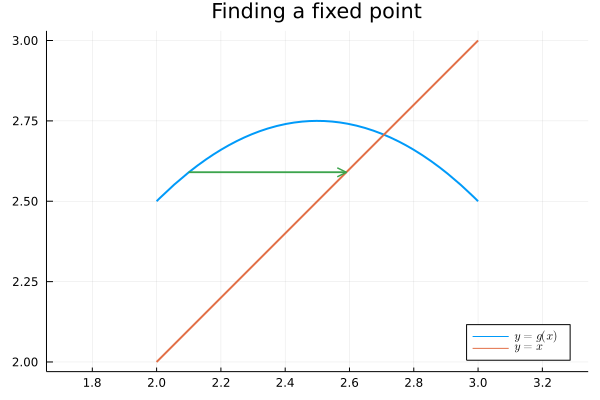

In [6]:
plot!([x,y],[y,y],label="",arrow=true)

So we started with $x_{0}=2.1$, obtained $x_{1}=g(x_{0})$, let's iterate again to find $x_{2}=g(x_{1})$:

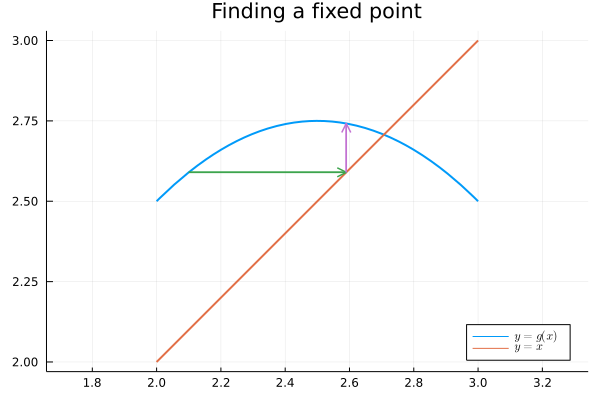

In [7]:
x = y;  y = g(x)
plot!([x,x],[x,y],label="",arrow=true)

We can continue to repeat this iterative process:

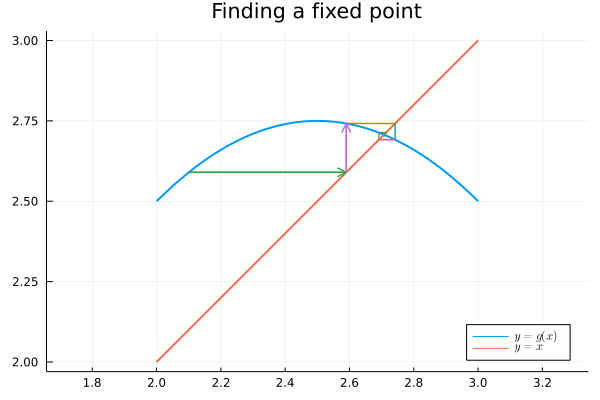

In [8]:
for k = 1:5
    plot!([x,y],[y,y],label="");  x = y;    # y --> new x
    y = g(x);  plot!([x,x],[x,y],label="")  # g(x) --> new y
end
display(plt)

**Question:** What is happening? 

Let's look at what happens if we try to find the other fixed-point value. We will start with $x_{0}=1.3$: 

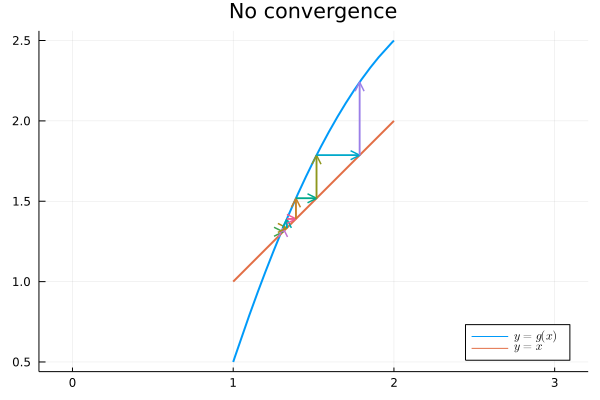

In [9]:
plt=plot([g,x->x],1,2,label=["\$y=g(x)\$" "\$y=x\$"],aspect_ratio=1,linewidth=2,
    title="No convergence",legend=:bottomright)
x = 1.3; y = g(x);
for k = 1:5
    plot!([x,y],[y,y],label="",arrow=true);  x = y;    # y --> new x
    y = g(x);  plot!([x,x],[x,y],label="",arrow=true)  # g(x) --> new y
end
display(plt)

This time, the iterations are moving away from the fixed point value. Here is the fixed point iteration, where we keep track of the whole sequence of approximations.

In [10]:
g = x -> x - f(x);
xf1 = 2.1; 
for k = 1:12
    xf1 = [xf1;g(xf1[k])]
end
xf1

13-element Vector{Float64}:
 2.1
 2.5900000000000003
 2.7419
 2.69148439
 2.713333728386328
 2.704488720332788
 2.708184363256659
 2.7066592708954196
 2.707291945752974
 2.707030049225946
 2.7071385587175025
 2.707093617492436
 2.707112233593897

In [11]:
xf2 = 1.3; 
for k = 1:12
    xf2 = [xf2;g(xf2[k])]
end
xf2

13-element Vector{Float64}:
 1.3
 1.3099999999999998
 1.3338999999999996
 1.3902107899999991
 1.518367909367574
 1.7863984386406127
 2.240772811625445
 2.6828012648074226
 2.716583697584807
 2.7030915019404933
 2.7087538418395543
 2.7064218335172265
 2.7073900266473867

Note that for $f(x) = x^2 - 4x + 3.5$, we have

$$
\begin{align*}
g(x) &= x - f(x) \\
&= x - (x^2 - 4x + 3.5) \\
&= x - x^2 + 4x - 3.5 \\
&= -x^2 + 5x - 3.5
\end{align*}
$$

Then $g'(x)=-2x+5$. Let's look at the value of $g'(x)$ evaluated at the fixed point values. 

In [12]:
g_prime(x) = -2x+5
print(g_prime(r[1])," ", g_prime(r[2]))

2.414213562373095 -0.4142135623730949

It's easiest to construct and plot the sequence of errors. Let's plot the error in iterations with the starting value $x_{0}=2.1$:

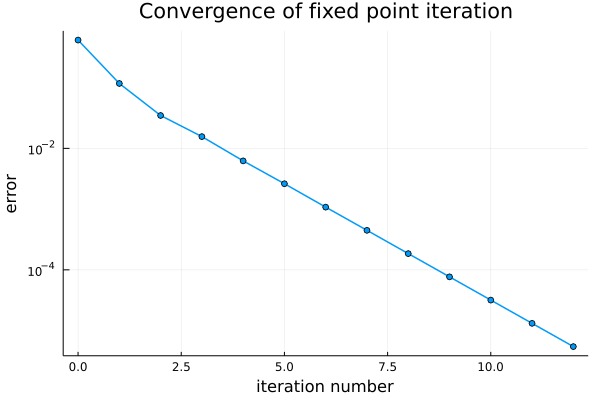

In [13]:
err = @. abs(xf1-r[2])
plot(0:12,err,m=:o,
    leg=:none,xaxis=("iteration number"),yaxis=("error",:log10),title="Convergence of fixed point iteration")

It's quite clear that the convergence quickly settles into a linear rate.

In [16]:
f_examp(x) = 1 - x^2

f_examp (generic function with 1 method)

In [18]:
ξ = (-1 + sqrt(5))/2

0.6180339887498949

In [21]:
x = 0.5
x = f_examp(x)
x = f_examp(x)
x = f_examp(x)
x = f_examp(x)
x = f_examp(x)
x = f_examp(x)
x = f_examp(x)

0.9492332761147301

In [22]:
1 - sqrt(35)/5

-0.18321595661992318

In [23]:
-5 + sqrt(35)

0.9160797830996161

In [26]:
f_examp2(x) = 1 - (1/10)*x^2
x = 1.0
x = f_examp2(x)
println(x)
x = f_examp2(x)
println(x)
x = f_examp2(x)
println(x)
x = f_examp2(x)
println(x)
x = f_examp2(x)
println(x)

0.9
0.919
0.9155439
0.916177936717279
0.9160617988272469
